** `matplotlib.pyplot` is a python library for visualizing plots, `mplot3d` is for creating 3D plots, 
and numpy is used for fast vectorized computations<br>**

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%config IPCompleter.greedy = True

In [2]:
%matplotlib notebook

Our Data point will be a random point in a basis 3D space 

In [3]:
B = np.zeros((4, 1), dtype=np.float)
B[0 : 3] = np.random.rand(3, 1) * 10
B[3] = 1
print(B)


[[3.21179865]
 [9.60335033]
 [4.77467131]
 [1.        ]]


** The `transform_matrix` function is used to compute the transformation matrix for a particalur axis and scale, <br>
and returns the transformed point **

In [4]:
def transform_matrix(data, ax, size):
    """
        peform linear transformation on a point in the determined axis 
        and by the size defined
    """
    data.reshape((4, 1))
    trans_matrix = np.eye(4, 4, dtype=np.float)
    trans_matrix[ax, 3] = size
    return trans_matrix, np.matmul(trans_matrix, data)

** `rotate_matrix` performs rotation on the data point**

In [5]:
def rotate_matrix(data, ax, degree):
    degree = (degree * np.pi) / 180
    if ax is not 1:
        rotations = np.array([[np.cos(degree), -np.sin(degree)], [np.sin(degree), np.cos(degree)]])
    else:
        rotations = np.array([[np.cos(degree), np.sin(degree)], [-np.sin(degree), np.cos(degree)]])
    rotations = np.insert(rotations, ax, [0, 0], axis=0)
    folan = np.zeros(3, dtype=np.float)
    folan[ax] = 1
    rotations = np.insert(rotations, ax, folan, axis=1)
    rotations = np.insert(rotations, 3, [0, 0, 0], axis = 0)
    rotations = np.insert(rotations, 3, [0, 0, 0, 1], axis = 1)
    return (rotations, np.matmul(rotations, data.reshape((4, 1))))

** I'll plot our random point in 3D space to get a sense of what our visualization looks like**

<IPython.core.display.Javascript object>


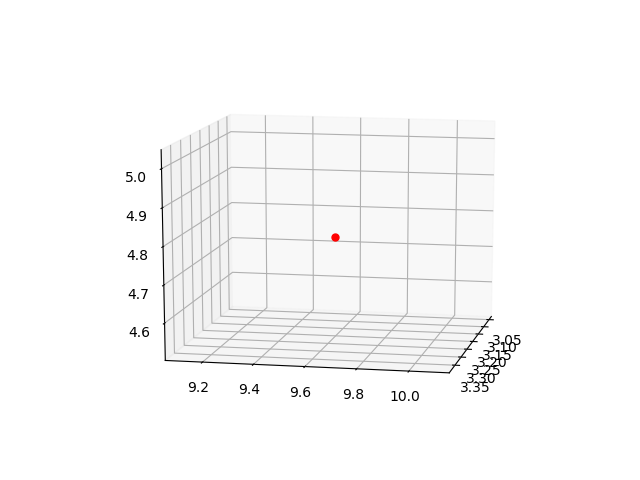

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(B[0], B[1], B[2], c='r', s = 25)
plt.show()

**Im gonna perform sequential transformations on the data point, then compute the equivalent transformation matrix <br>
and compare the results to verify that both are the same**

In [7]:
print(B)
points = []
points.append(B[0:3])
M1 ,B_1 = rotate_matrix(B, 0, 90)
print(B_1)
points.append(B_1[0:3])
M2, B_2 = transform_matrix(B_1, 2, 3)
print(B_2)
points.append(B_2[0:3])
M3, B_3 = rotate_matrix(B_2, 2, 90)
print(B_3)
points.append(B_3[0:3])
M4, B_4 = transform_matrix(B_3, 1, 5)
points.append(B_4[0:3])
print(B_4)
M_final = np.matmul(M2, np.matmul(M4, np.matmul(M3, M1)))
print(np.matmul(M_final, B))

[[3.21179865]
 [9.60335033]
 [4.77467131]
 [1.        ]]
[[ 3.21179865]
 [-4.77467131]
 [ 9.60335033]
 [ 1.        ]]
[[ 3.21179865]
 [-4.77467131]
 [12.60335033]
 [ 1.        ]]
[[ 4.77467131]
 [ 3.21179865]
 [12.60335033]
 [ 1.        ]]
[[ 4.77467131]
 [ 8.21179865]
 [12.60335033]
 [ 1.        ]]
[[ 4.77467131]
 [ 8.21179865]
 [12.60335033]
 [ 1.        ]]


** This is a different example, similar to above **

In [8]:
print(B)
points_2 = []
points_2.append(B[0:3])
M1 ,B_1 = rotate_matrix(B, 1, 90)
print(B_1)
points_2.append(B_1[0:3])
M2, B_2 = rotate_matrix(B_1, 1, 30)
print(B_2)
points_2.append(B_2[0:3])
M3, B_3 = transform_matrix(B_2, 0, 5)
print(B_3)
points_2.append(B_3[0:3])
M4, B_4 = transform_matrix(B_3, 0, 4)
print(B_4)
points_2.append(B_4[0:3])
M_final_2 = np.matmul(M3, np.matmul(M4, np.matmul(M2, M1)))
print(np.matmul(M_final_2, B))

[[3.21179865]
 [9.60335033]
 [4.77467131]
 [1.        ]]
[[ 4.77467131]
 [ 9.60335033]
 [-3.21179865]
 [ 1.        ]]
[[ 2.52908732]
 [ 9.60335033]
 [-5.16883488]
 [ 1.        ]]
[[ 7.52908732]
 [ 9.60335033]
 [-5.16883488]
 [ 1.        ]]
[[11.52908732]
 [ 9.60335033]
 [-5.16883488]
 [ 1.        ]]
[[11.52908732]
 [ 9.60335033]
 [-5.16883488]
 [ 1.        ]]


In [9]:
points = np.reshape(points, (5, 3))
print(np.shape(points[:, 1]))

points_2 = np.reshape(points_2, (5, 3))
print(np.shape(points_2[:, 1]))

(5,)
(5,)


** Now lets visualize our results to see what the transformations look like <br> 
the colors go in this order: Red, Yellow, Cyan, Green, Blue **

<IPython.core.display.Javascript object>


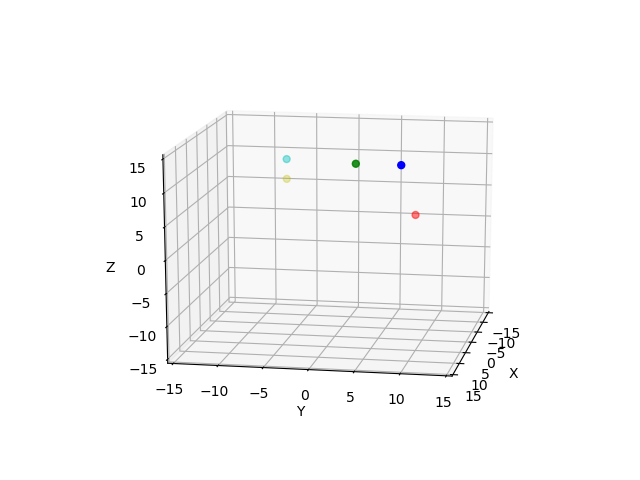

<IPython.core.display.Javascript object>


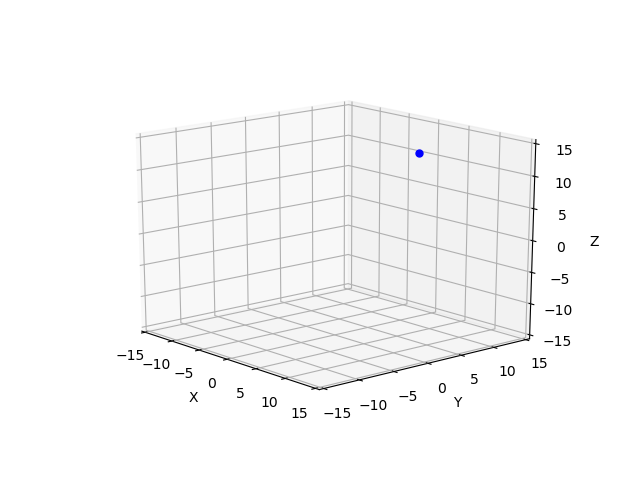

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='rycgb', s = 25)
ax.set_xlabel('X')
ax.set_xlim(left=-15, right=15)
ax.set_ylabel('Y')
ax.set_ylim(bottom=-15, top=15)
ax.set_zlabel('Z')
ax.set_zlim(bottom=-15, top=15)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
final = np.matmul(M_final, B)
ax.scatter(final[0], final[1], final[2], c='b', s = 25)
ax.set_xlabel('X')
ax.set_xlim(left=-15, right=15)
ax.set_ylabel('Y')
ax.set_ylim(bottom=-15, top=15)
ax.set_zlabel('Z')
ax.set_zlim(bottom=-15, top=15)
plt.show()

<IPython.core.display.Javascript object>


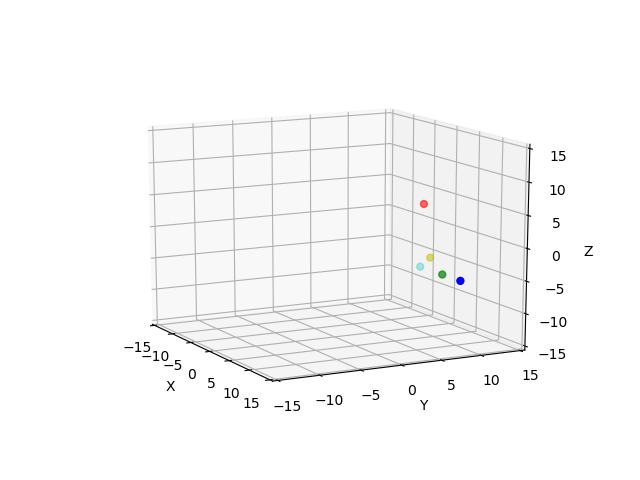

<IPython.core.display.Javascript object>


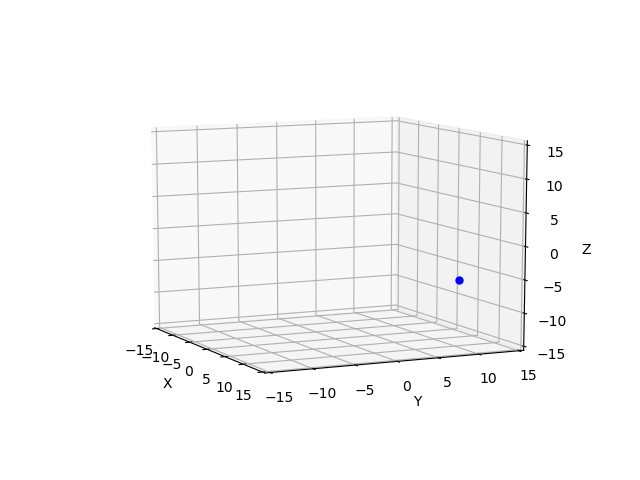

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_2[:, 0], points_2[:, 1], points_2[:, 2], c='rycgb', s = 25)
ax.set_xlabel('X')
ax.set_xlim(left=-15, right=15)
ax.set_ylabel('Y')
ax.set_ylim(bottom=-15, top=15)
ax.set_zlabel('Z')
ax.set_zlim(bottom=-15, top=15)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
final = np.matmul(M_final_2, B)
ax.scatter(final[0], final[1], final[2], c='b', s = 25)
ax.set_xlabel('X')
ax.set_xlim(left=-15, right=15)
ax.set_ylabel('Y')
ax.set_ylim(bottom=-15, top=15)
ax.set_zlabel('Z')
ax.set_zlim(bottom=-15, top=15)
plt.show()